# **Librerias**

In [1]:
# Importamos

import jax
import torch
import warnings
import matplotlib
import jax.numpy as jaxnp
import matplotlib.pyplot as plt

from torch.func import jacrev

# Logging 

warnings.filterwarnings('ignore', category = UserWarning)
warnings.filterwarnings('ignore', category = FutureWarning)

# Version 

print(f'JAX Version: {jax.__version__}')
print(f'Pytorch Version: {torch.__version__}')
print(f'Matplotlib Version: {matplotlib.__version__}')

JAX Version: 0.4.34
Pytorch Version: 2.5.1+cpu
Matplotlib Version: 3.9.2


# **Aproximacion Cuadratica**

**Expansion de Taylor:**

$$f(x + \Delta x) = f(x) + f^{\prime}(x) \cdot \Delta x + \frac{f^{\prime\prime}(x)}{2!} \cdot (\Delta x)^2 + \frac{f^{\prime\prime\prime}(x)}{3!} \cdot (\Delta x)^3 + ...$$

**Aproximacion Cuadratica:** 

$$df^2 = f(x + \Delta x) - f(x) = f(x) + f^{\prime}(x) \cdot \Delta x + \frac{f^{\prime\prime}(x)}{2!} \cdot (\Delta x)^2 - f(x) = f^{\prime}(x) \cdot \Delta x + \frac{f^{\prime\prime}(x)}{2!} \cdot (\Delta x)^2$$

**Sustituimos el diferencial por una diferencia finita $\delta x$ muy pequeña**

$$df^2 = f(x + \delta x) - f(x) = f^{\prime}(x) \cdot \delta x + \frac{f^{\prime\prime}(x)}{2!} \cdot (\delta x)^2 + o(\, \|\delta x^{2}\|)$$


**Eliminamos los terminos de Orden Superior $o(\, \|\delta x^{2}\|)$**

$$df^2 = f(x + \delta x) - f(x) \approx f^{\prime}(x) \cdot \delta x + \frac{f^{\prime\prime}(x)}{2!} \cdot (\delta x)^2$$

**Forward Difference:**    $\hspace{1cm}df^2 = f^{\prime}(x + \delta x) - f^{\prime}(x)$

**Backward Difference:**    $\hspace{0.8cm}df^2 = f^{\prime}(x) - f^{\prime}(x + \delta x)$

**Funciones Escalares:** $\hspace{0.95cm}df^2 = J \cdot \delta x$

**Funciones Vectoriales:** $\hspace{0.7cm}df^2 = H \cdot \delta x$

### **Visualizacion 2D**

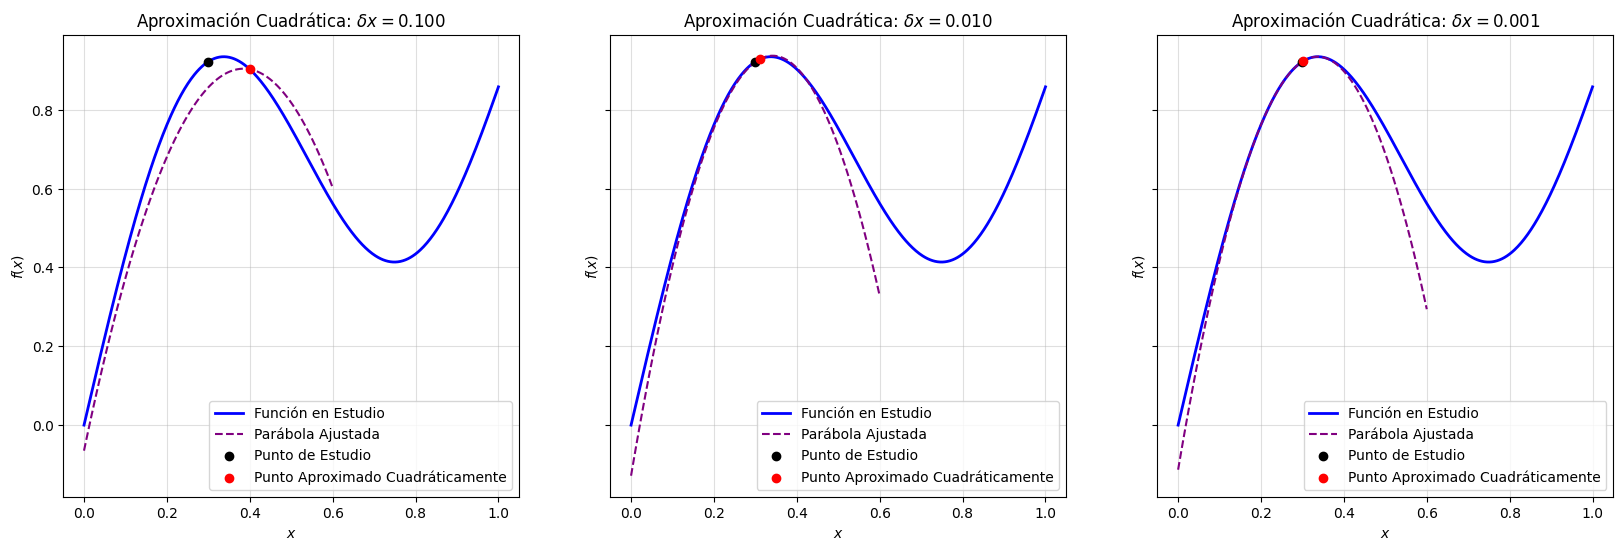

In [2]:
# Definimos la Funcion Escalar 

def scalar_Fn(x_point): 
    
    output = jaxnp.sin(1.5 * x_point) + 0.5 * jaxnp.sin(6 * x_point) 
    
    return output 

# Generamos los Puntos de la Funcion Escalar

x = jaxnp.linspace(start = 0, stop = 1, num = 500) 
y = scalar_Fn(x)

# Definimos la Lista de Diferencias finitas 

delta_x = jaxnp.logspace(start = -1, stop = -3, num = 3)

# Definimos el Punto de Estudio 

x_point = 0.3 

# Calculamos la Aproximacion Lineal y Cuadratica para todas las Diferencias Finitas en el Punto de Estudio 

def quadratic_approx(x_point, delta_x): 
       
    linear_approx = scalar_Fn(x_point + delta_x) - scalar_Fn(x_point)    
    parabola_approx = scalar_Fn(x_point) + scalar_Fn(x_point +  2 * delta_x) - 2 * scalar_Fn(x_point + delta_x)
    
    return linear_approx, parabola_approx

# Definimos los Puntos de la Parabola

tag_parabola_points = jaxnp.linspace(start = x_point - 0.3, stop = x_point + 0.3, num = 100)

# Calculamos la Parábola Tangente basada en el Punto de Aproximación

def tag_parabola(x_point, delta_x, linear_approx, parabola_approx, tag_parabola_points): 

    slope = linear_approx / delta_x 
    curve = parabola_approx / (delta_x)**2
        
    parabola = scalar_Fn(x_point + delta_x) + slope * (tag_parabola_points - (x_point + delta_x)) + 0.5 * curve * (tag_parabola_points - (x_point + delta_x))**2
    
    return parabola 

# Visualizamos

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharex=True, sharey=True)

for idx in range(len(delta_x)):    
   
    axes[idx].plot(x, y, label='Función en Estudio', color='blue', linewidth=2)
    axes[idx].plot(tag_parabola_points, tag_parabola(x_point, delta_x[idx], quadratic_approx(x_point, delta_x[idx])[0], quadratic_approx(x_point, delta_x[idx])[1], tag_parabola_points), color='purple', linestyle='--', label='Parábola Ajustada', linewidth=1.5)
    
    axes[idx].scatter(x_point, scalar_Fn(x_point), color='black', label='Punto de Estudio', zorder=5)
    axes[idx].scatter(x_point + delta_x[idx], scalar_Fn(x_point + delta_x[idx]), color='red', label='Punto Aproximado Cuadráticamente', zorder=5)
    
    axes[idx].set_title(f'Aproximación Cuadrática: $\delta x = ${delta_x[idx]:.3f}')
    axes[idx].set_xlabel('$x$')
    axes[idx].set_ylabel('$f(x)$')
    axes[idx].legend(loc='lower right')
    axes[idx].grid(alpha=0.4)

plt.show()

### **Visualizacion 3D**

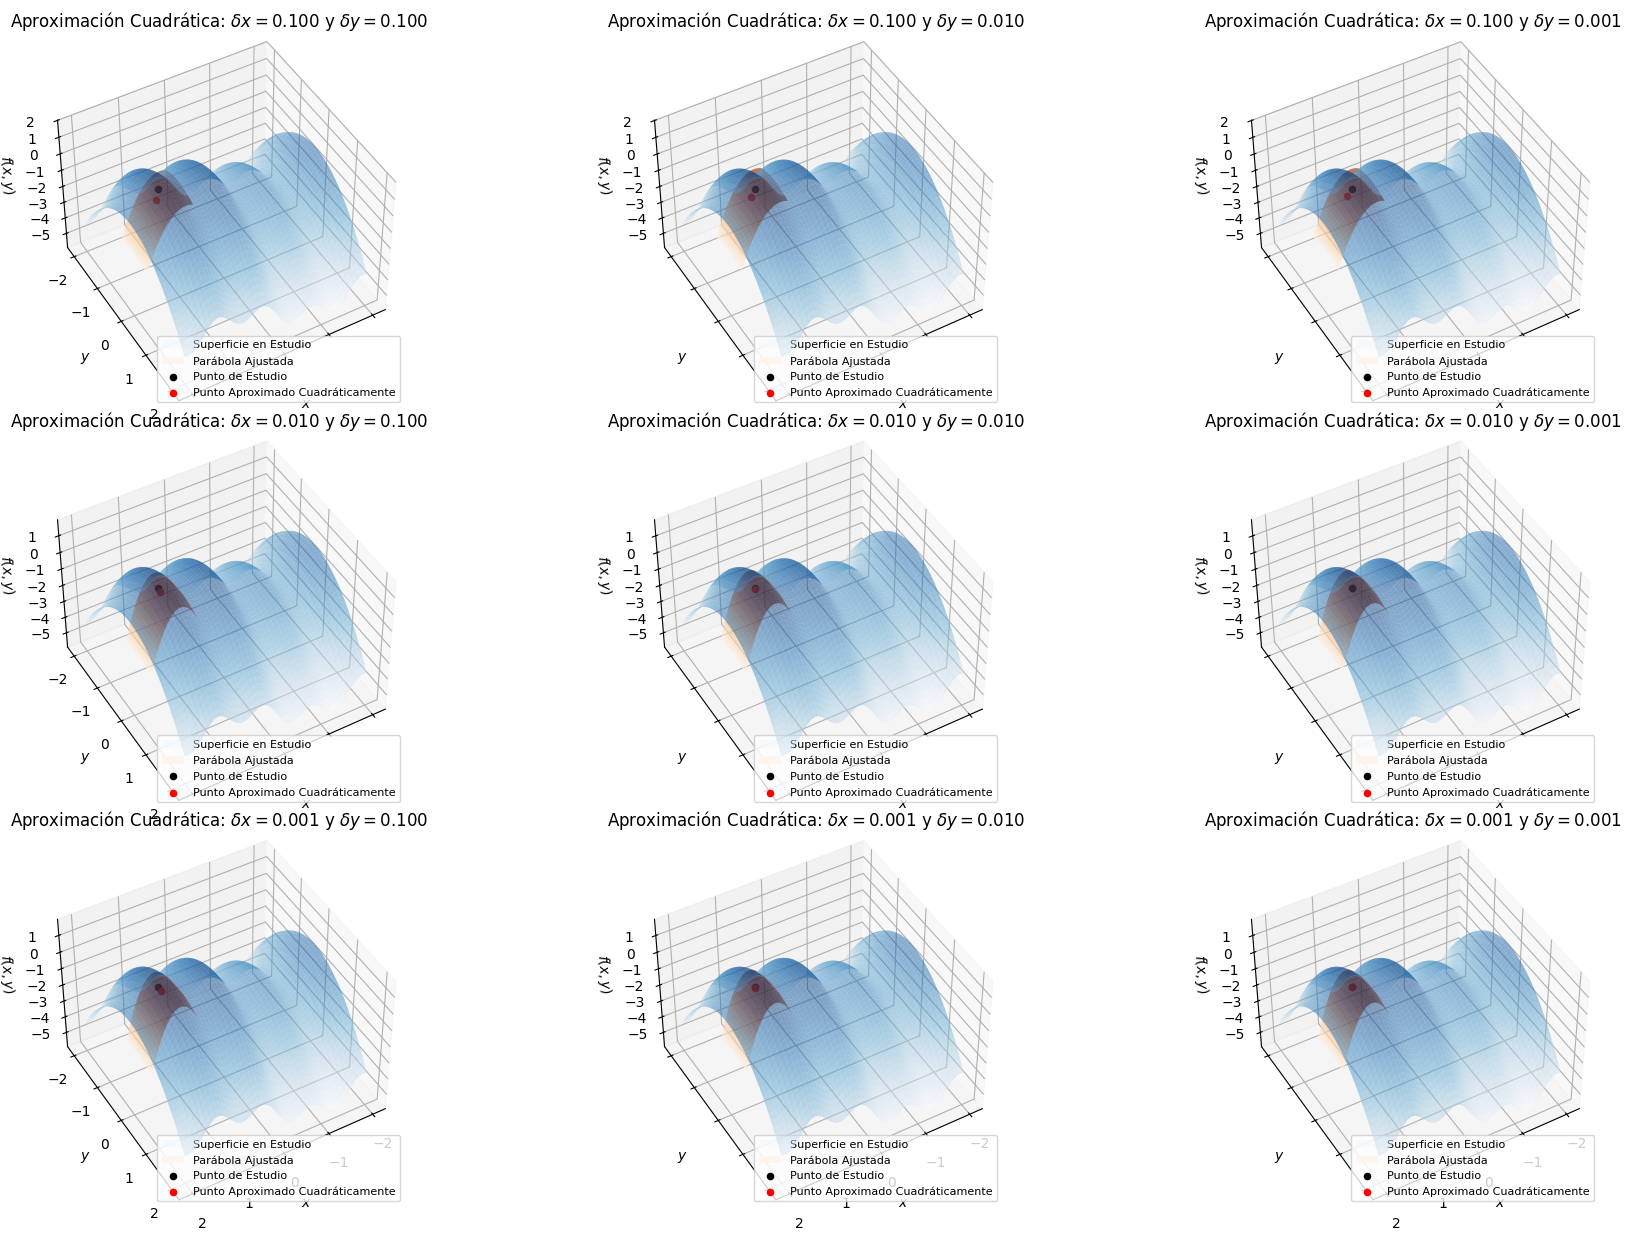

In [3]:
# Definimos la Funcion Vectorial

def vector_Fn(x_point, y_point): 
    
    output = jaxnp.sin(1.5 * x_point) + 0.5 * jaxnp.sin(6 * x_point) - y_point**2
    
    return output 

# Generamos los Puntos de la Funcion Vectorial

x_surf = jaxnp.linspace(start = -2, stop = 2, num = 500) 
y_surf = jaxnp.linspace(start = -2, stop = 2, num = 500)

X_surf, Y_surf = jaxnp.meshgrid(x_surf, y_surf)
z_surf = vector_Fn(X_surf, Y_surf) 

# Definimos la Lista de Diferencias finitas

delta_x = jaxnp.logspace(start = -1, stop = -3, num = 3)
delta_y = jaxnp.logspace(start = -1, stop = -3, num = 3)

# Definimos la Coordenada del Punto de Estudio

x_point = 1.4
y_point = 0

# Calculamos la Aproximacion Cuadrática para todas las Diferencias Finitas en los Puntos de Estudio

def quadratic_approx(x_point, y_point, delta_x, delta_y): 
    
    # Aproximación Lineal
    linear_approx_x = vector_Fn(x_point + delta_x, y_point) - vector_Fn(x_point, y_point)  
    linear_approx_y = vector_Fn(x_point, y_point + delta_y) - vector_Fn(x_point, y_point)  

    # Aproximación Cuadrática
    quadratic_approx_x = vector_Fn(x_point + 2 * delta_x, y_point) + vector_Fn(x_point, y_point) - 2 * vector_Fn(x_point + delta_x, y_point)
    quadratic_approx_y = vector_Fn(x_point, y_point + 2 * delta_y) + vector_Fn(x_point, y_point) - 2 * vector_Fn(x_point, y_point + delta_y)
    
    return linear_approx_x, linear_approx_y, quadratic_approx_x, quadratic_approx_y

# Calculamos la Parábola Tangente Cuadrática basada en los Puntos de Aproximación

def tag_parabola(x_point, y_point, delta_x, delta_y, linear_approx_x, linear_approx_y, quadratic_approx_x, quadratic_approx_y, x_plane, y_plane):
    
    slope_x = linear_approx_x / delta_x 
    slope_y = linear_approx_y / delta_y
    
    curve_x = quadratic_approx_x / (delta_x**2)
    curve_y = quadratic_approx_y / (delta_y**2)
    
    parabola = vector_Fn(x_point + delta_x, y_point + delta_y) + slope_x * (x_plane - (x_point + delta_x)) + 0.5 * (curve_x) * (x_plane - (x_point + delta_x))**2 + slope_y * (y_plane - (y_point + delta_y)) + 0.5 * (curve_y) * (y_plane - (y_point + delta_y))**2
               
    return parabola 

# Visualizamos

fig, axes = plt.subplots(3, 3, figsize = (20, 12), sharex = True, sharey = True, subplot_kw = {'projection': '3d'})

for idx in range(0, len(delta_x)):
    for idy in range(0, len(delta_y)):
        
        # Calculamos las Aproximaciones Cuadráticas
        linear_x, linear_y, quadratic_x, quadratic_y = quadratic_approx(x_point, y_point, delta_x[idx], delta_y[idy]) 
        
        # Definimos los Puntos del Plano Tangente        
        x_plane = jaxnp.linspace(start = (x_point + delta_x[idx]) - 0.5, stop = (x_point + delta_x[idx]) + 0.5, num = 100)
        y_plane = jaxnp.linspace(start = (y_point + delta_y[idy]) - 0.5, stop = (y_point + delta_y[idy]) + 0.5, num = 100)

        X_plane, Y_plane = jaxnp.meshgrid(x_plane, y_plane)
        
        # Calculamos la Parábola Ajustada
        Z_parabola = tag_parabola(x_point, y_point, delta_x[idx], delta_y[idy], linear_x, linear_y, quadratic_x, quadratic_y, X_plane, Y_plane)  
        
        # Visualizamos        
        axes[idx][idy].plot_surface(X_surf, Y_surf, z_surf, cmap = 'Blues', alpha = 0.5, label = "Superficie en Estudio")
        axes[idx][idy].plot_surface(X_plane, Y_plane, Z_parabola, cmap = 'Oranges', alpha = 0.8, label = "Parábola Ajustada")
        
        axes[idx][idy].scatter(x_point, y_point, vector_Fn(x_point, y_point), color = 'black', label = f'Punto de Estudio', zorder = 5)
        axes[idx][idy].scatter(x_point + delta_x[idx], y_point + delta_y[idy], vector_Fn(x_point + delta_x[idx], y_point + delta_y[idy]), color = 'red', label = f'Punto Aproximado Cuadráticamente', zorder = 5) 

        axes[idx][idy].set_xlabel('$x$')
        axes[idx][idy].set_ylabel('$y$')
        axes[idx][idy].set_zlabel('$f(x, y)$')
        axes[idx][idy].set_title(f'Aproximación Cuadrática: $\delta x = ${delta_x[idx]:.3f} y $\delta y = ${delta_y[idy]:.3f}')

        axes[idx][idy].legend(loc = 'lower right', fontsize = 8)                                                                                                                                                                                  
        axes[idx][idy].grid(alpha = 0.2, fontsize = 8)  
        
        axes[idx][idy].view_init(azim = 60, elev = 45)        

plt.subplots_adjust(hspace = 1)
plt.tight_layout(pad = 0.1)
plt.show()

# **Hessiana desde Gradientes**

### **Ejercicio #1**

**Funcion:**

$$F(X) = \text{Tr}(X^2B)$$

**Primera Derivada:**

$$F(X) = \text{Tr}(XXB)$$
$$F(X) = \text{Tr}(BXX)$$
$$df(X) = \text{Tr}(d(BXX))$$
$$df(X) = \text{Tr}(BXdX + BdXX + dBXX)$$
$$df(X) = \text{Tr}(BXdX + BdXX)$$
$$df(X) = \text{Tr}(BXdX) +  \text{Tr}(BdXX)$$
$$df(X) = \text{Tr}(BXdX) +  \text{Tr}(XBdX)$$

**Gradiente:** 

$$(\nabla X)^T = BX + XB$$
$$\nabla X = (BX + XB)^T$$

**Segunda Derivada:**

$$df(X) = (BX + XB)^T$$
$$df(X) = X^TB^T + B^TX^T$$
$$df^2(X) = dX^TB^T + X^TdB^T + dB^TX^T + B^TdX^T$$
$$df^2(X) = dX^TB^T + B^TdX^T$$
$$df^2(X) = IdX^TB^T + B^TdX^TI$$
$$df^2(X) = vec(IdX^TB^T) + vec(B^TdX^TI)$$
$$df^2(X) = (B \otimes I) \cdot vec(dX^T) + (I \otimes B^T) \cdot vec(dX^T)$$
$$df^2(X) = (B \otimes I) \cdot K_{m, n} \cdot vec(dX) + (I \otimes B^T) \cdot K_{m, n} \cdot vec(dX)$$
$$df^2(X) = ((B \otimes I) \cdot K_{m, n} + (I \otimes B^T) \cdot K_{m, n}) \cdot vec(dX)$$

**Hessiana:**

$$H = (B \otimes I) \cdot K_{m, n} + (I \otimes B^T) \cdot K_{m, n}$$

In [4]:
# Definimos la Semilla

torch.manual_seed(42)

# Definimos la funcion Escalar

def Fn(X, B):   
    
    output = torch.matmul(X, X) 
    output = torch.matmul(output, B)
    output = torch.trace(output)
    
    return output

# Definimos el Gradiente 

def gradient(X, B):   
    
    output = torch.matmul(B, X) + torch.matmul(X, B)
    output = output.T
    
    return output

# Definimos las Matrices Derivables 

X = torch.tensor([[1.0, 2.0, 7.0], [3.0, 4.0, 9.0], [5.0, 4.0, 1.0]], requires_grad = True, dtype = torch.float64)
B = torch.tensor([[5.0, 2.0, 5.0], [1.0, 7.0, 2.0], [5.0, 1.0, 1.0]], requires_grad = False, dtype = torch.float64)

# Definimos el Diferencial Finito 

epsilon = 1e-8

dX = torch.randn(size = X.shape, dtype = torch.float64) * epsilon 

# Visualizamos 

print(f'Variable Diferenciable: \n{X}\n')
print(f'Diferencial Finito: \n{dX}')

Variable Diferenciable: 
tensor([[1., 2., 7.],
        [3., 4., 9.],
        [5., 4., 1.]], dtype=torch.float64, requires_grad=True)

Diferencial Finito: 
tensor([[ 3.3669e-09,  1.2881e-09,  2.3446e-09],
        [ 2.3033e-09, -1.1229e-08, -1.8633e-09],
        [ 2.2082e-08, -6.3800e-09,  4.6166e-09]], dtype=torch.float64)


In [5]:
# Calculamos la Derivada Exacta 

exact = torch.matmul(dX.T, B.T) + torch.matmul(B.T, dX.T)

# Visualizamos 

print(f'Derivada Vectorial Exacta: \n{exact}')

Derivada Vectorial Exacta: 
tensor([[ 1.6170e-07,  5.4626e-08,  1.6833e-07],
        [-2.9821e-08, -1.6593e-07, -7.0473e-09],
        [ 5.2835e-08, -1.4269e-08,  1.1674e-07]], dtype=torch.float64)


In [6]:
# Calculamos la Derivada con la Aproximacion Cuadratica

cuadratic_approx = gradient(X + dX, B) - gradient(X, B) 

# Visualizamos 

print(f'Error: {torch.norm(cuadratic_approx - exact) / torch.norm(exact)}\n')
print(f'Derivada Vectorial con Aproximacion Cuadratica: \n{cuadratic_approx}')

Error: 3.832980057851447e-08

Derivada Vectorial con Aproximacion Cuadratica: 
tensor([[ 1.6170e-07,  5.4626e-08,  1.6833e-07],
        [-2.9821e-08, -1.6593e-07, -7.0473e-09],
        [ 5.2835e-08, -1.4269e-08,  1.1674e-07]], dtype=torch.float64,
       grad_fn=<SubBackward0>)


In [7]:
# Calculamos la Matriz Hessiana (Indicamos con respecto a que argumento derivamos dos veces en nuestro caso el primer argumento 0 --> X) (backward-mode)

hessian = jacrev(jacrev(Fn, argnums = 0), argnums = 0)(X, B)

# Redimensionamos

new_shape = (hessian.shape[0] * hessian.shape[1], hessian.shape[2] * hessian.shape[3])

hessian = hessian.reshape(new_shape)

# Vectorizamos el Diferencial 

dX_vec = dX.view(-1, 1)

# Calculamos la Derivada con Vectorizacion

vec = torch.matmul(hessian, dX_vec).reshape(exact.shape)

# Visualizamos 

print(f'Error: {torch.norm(vec - exact) / torch.norm(exact)}\n')
print(f'Derivada Vectorial con Vectorizacion: \n{vec}')

Error: 1.2737693032018466e-16

Derivada Vectorial con Vectorizacion: 
tensor([[ 1.6170e-07,  5.4626e-08,  1.6833e-07],
        [-2.9821e-08, -1.6593e-07, -7.0473e-09],
        [ 5.2835e-08, -1.4269e-08,  1.1674e-07]], dtype=torch.float64)


### **Ejercicio #2**

**Funcion:**

$$F(X) = \text{Tr}(AXBX^TC)$$

**Primera Derivada:**

$$df(X) = \text{Tr}(d(AXBX^TC))$$
$$df(X) = \text{Tr}(AXBX^TdC + AXBdX^TC + AXdBX^TC + AdXBX^TC + dAXBX^TC)$$
$$df(X) = \text{Tr}(AXBdX^TC + AdXBX^TC)$$
$$df(X) = \text{Tr}(AXBdX^TC) +  \text{Tr}(AdXBX^TC)$$
$$df(X) = \text{Tr}(dX^TCAXB) +  \text{Tr}(BX^TCAdX)$$
$$df(X) = \text{Tr}(dX^TCAXB) +  \text{Tr}(BX^TCAdX)$$
$$df(X) = \text{Tr}(B^TX^TA^TC^TdX) +  \text{Tr}(BX^TCAdX)$$

**Gradiente:** 

$$(\nabla X)^T = B^TX^TA^TC^T + BX^TCA$$
$$\nabla X = CAXB + A^TC^TXB^T$$

**Segunda Derivada:**

$$df(X) = CAXB + A^TC^TXB^T$$
$$df^2(X) = dCAXB + CdAXB + CAdXB + CAXdB + dA^TC^TXB^T + A^TdC^TXB^T + A^TC^TdXB^T + A^TC^TXdB^T$$
$$df^2(X) = CAdXB + A^TC^TdXB^T$$
$$df^2(X) =  vec(CAdXB) + vec(A^TC^TdXB^T)$$
$$df^2(X) =  (B^T \otimes CA) \cdot vec(dX) + (B \otimes A^TC^T) \cdot vec(dX)$$
$$df^2(X) =  (B^T \otimes CA + B \otimes A^TC^T) \cdot vec(dX)$$

**Hessiana:**

$$H = B^T \otimes CA + B \otimes A^TC^T$$

In [8]:
# Definimos la Semilla

torch.manual_seed(42)

# Definimos la funcion Escalar

def Fn(X, A, B, C):   
    
    output = torch.matmul(A, X) 
    output = torch.matmul(output, B)
    output = torch.matmul(output, X.T)
    output = torch.matmul(output, C)
    output = torch.trace(output)
    
    return output

# Definimos el Gradiente 

def gradient(X, A, B, C):   
    
    output = torch.matmul(torch.matmul(torch.matmul(C, A), X), B) + torch.matmul(torch.matmul(torch.matmul(A.T, C.T), X), B.T)
    
    return output

# Definimos las Matrices Derivables 

X = torch.tensor([[1.0, 2.0, 7.0, 5.0], [3.0, 4.0, 9.0, 1.0], [5.0, 4.0, 1.0, 3.0]], requires_grad = True, dtype = torch.float64)
A = torch.tensor([[5.0, 2.0, 5.0], [1.0, 7.0, 2.0]], requires_grad = False, dtype = torch.float64)
B = torch.tensor([[5.0, 2.0, 5.0, 9.0], [1.0, 7.0, 2.0, 9.0], [5.0, 1.0, 1.0, 9.0], [5.0, 1.0, 1.0, 9.0]], requires_grad = False, dtype = torch.float64)
C = torch.tensor([[5.0, 4.0], [2.0, 2.0], [8.0, 5.0]], requires_grad = False, dtype = torch.float64)

# Definimos el Diferencial Finito 

epsilon = 1e-8

dX = torch.randn(size = X.shape, dtype = torch.float64) * epsilon 

# Visualizamos 

print(f'Variable Diferenciable: \n{X}\n')
print(f'Diferencial Finito: \n{dX}')

Variable Diferenciable: 
tensor([[1., 2., 7., 5.],
        [3., 4., 9., 1.],
        [5., 4., 1., 3.]], dtype=torch.float64, requires_grad=True)

Diferencial Finito: 
tensor([[ 3.3669e-09,  1.2881e-09,  2.3446e-09,  2.3033e-09],
        [-1.1229e-08, -1.8633e-09,  2.2082e-08, -6.3800e-09],
        [ 4.6166e-09,  2.6735e-09,  5.3490e-09,  8.0936e-09]],
       dtype=torch.float64)


In [9]:
# Calculamos la Derivada Exacta 

exact = torch.matmul(torch.matmul(torch.matmul(C, A), dX), B) + torch.matmul(torch.matmul(torch.matmul(A.T, C.T), dX), B.T)

# Visualizamos 

print(f'Derivada Vectorial Exacta: \n{exact}')

Derivada Vectorial Exacta: 
tensor([[1.2229e-05, 6.6603e-06, 5.1534e-06, 1.4231e-05],
        [1.0543e-05, 6.6793e-06, 5.2665e-06, 9.2265e-06],
        [1.5572e-05, 8.0434e-06, 6.1738e-06, 1.9546e-05]], dtype=torch.float64)


In [10]:
# Calculamos la Derivada con la Aproximacion Cuadratica

cuadratic_approx = gradient(X + dX, A, B, C) - gradient(X, A, B, C) 

# Visualizamos 

print(f'Error: {torch.norm(cuadratic_approx - exact) / torch.norm(exact)}\n')
print(f'Derivada Vectorial con Aproximacion Cuadratica: \n{cuadratic_approx}')

Error: 9.081156502735737e-08

Derivada Vectorial con Aproximacion Cuadratica: 
tensor([[1.2229e-05, 6.6603e-06, 5.1534e-06, 1.4231e-05],
        [1.0543e-05, 6.6793e-06, 5.2665e-06, 9.2265e-06],
        [1.5572e-05, 8.0434e-06, 6.1738e-06, 1.9546e-05]], dtype=torch.float64,
       grad_fn=<SubBackward0>)


In [11]:
# Calculamos la Matriz Hessiana (Indicamos con respecto a que argumento derivamos dos veces en nuestro caso el primer argumento 0 --> X) (backward-mode)

hessian = jacrev(jacrev(Fn, argnums = 0), argnums = 0)(X, A, B, C)

# Redimensionamos

new_shape = (hessian.shape[0] * hessian.shape[1], hessian.shape[2] * hessian.shape[3])

hessian = hessian.reshape(new_shape)

# Vectorizamos el Diferencial 

dX_vec = dX.view(-1, 1)

# Calculamos la Derivada con Vectorizacion

vec = torch.matmul(hessian, dX_vec).reshape(exact.shape)

# Visualizamos 

print(f'Error: {torch.norm(vec - exact) / torch.norm(exact)}\n')
print(f'Derivada Vectorial con Vectorizacion: \n{vec}')

Error: 1.0547094578266673e-16

Derivada Vectorial con Vectorizacion: 
tensor([[1.2229e-05, 6.6603e-06, 5.1534e-06, 1.4231e-05],
        [1.0543e-05, 6.6793e-06, 5.2665e-06, 9.2265e-06],
        [1.5572e-05, 8.0434e-06, 6.1738e-06, 1.9546e-05]], dtype=torch.float64)


### **Ejercicio #3**

**Funcion:**

$$F(X) = \, \|X\|_F^2$$

**Primera Derivada:**

$$df(X) = \text{Tr}(d(X X^T))$$
$$df(X) = \text{Tr}(XdX^T + dXX^T)$$
$$df(X) = \text{Tr}(dXX^T + dXX^T)$$
$$df(X) = \text{Tr}(dXX^T) +  \text{Tr}(dXX^T)$$
$$df(X) = \text{Tr}(X^TdX) +  \text{Tr}(X^TdX)$$

**Gradiente:** 

$$(\nabla X)^T = X^T + X^T = 2X^T$$
$$\nabla X = 2X$$

**Segunda Derivada:**

$$df(X) = 2X$$
$$df^2(X) = 2dX$$
$$df^2(X) = 2IdXI$$
$$df^2(X) = 2 \cdot vec(IdXI)$$
$$df^2(X) = 2 \cdot (I \otimes I) \cdot vec(dX)$$

**Hessiana:**

$$H = 2 \cdot (I \otimes I)$$

In [12]:
# Definimos la Semilla

torch.manual_seed(42)

# Definimos la funcion Escalar

def Fn(X):   
    
    output = torch.norm(X)**2 
    
    return output

# Definimos el Gradiente 

def gradient(X):   
    
    output = 2 * X
    
    return output

# Definimos la Matriz Derivable 

X = torch.tensor([[1.0, 2.0, 7.0, 5.0], [3.0, 4.0, 9.0, 1.0], [5.0, 4.0, 1.0, 3.0], [9.0, 5.0, 7.0, 2.0]], requires_grad = True, dtype = torch.float64)

# Definimos el Diferencial Finito 

epsilon = 1e-8

dX = torch.randn(size = X.shape, dtype = torch.float64) * epsilon 

# Visualizamos 

print(f'Variable Diferenciable: \n{X}\n')
print(f'Diferencial Finito: \n{dX}')

Variable Diferenciable: 
tensor([[1., 2., 7., 5.],
        [3., 4., 9., 1.],
        [5., 4., 1., 3.],
        [9., 5., 7., 2.]], dtype=torch.float64, requires_grad=True)

Diferencial Finito: 
tensor([[ 2.9956e-09,  2.4238e-09,  2.8321e-09, -2.3294e-09],
        [ 6.7115e-09,  7.8177e-09, -1.7903e-08, -1.7484e-08],
        [ 1.7348e-09,  2.6684e-09,  4.2852e-09,  2.3187e-09],
        [-1.0215e-08, -8.2726e-09,  1.7342e-08, -1.4921e-08]],
       dtype=torch.float64)


In [13]:
# Calculamos la Derivada Exacta 

exact = 2 * dX

# Visualizamos 

print(f'Derivada Vectorial Exacta: \n{exact}')

Derivada Vectorial Exacta: 
tensor([[ 5.9911e-09,  4.8476e-09,  5.6641e-09, -4.6588e-09],
        [ 1.3423e-08,  1.5635e-08, -3.5806e-08, -3.4968e-08],
        [ 3.4695e-09,  5.3369e-09,  8.5703e-09,  4.6374e-09],
        [-2.0429e-08, -1.6545e-08,  3.4684e-08, -2.9841e-08]],
       dtype=torch.float64)


In [14]:
# Calculamos la Derivada con la Aproximacion Cuadratica

cuadratic_approx = gradient(X + dX) - gradient(X) 

# Visualizamos 

print(f'Error: {torch.norm(cuadratic_approx - exact) / torch.norm(exact)}\n')
print(f'Derivada Vectorial con Aproximacion Cuadratica: \n{cuadratic_approx}')

Error: 2.5738103145487036e-08

Derivada Vectorial con Aproximacion Cuadratica: 
tensor([[ 5.9911e-09,  4.8476e-09,  5.6641e-09, -4.6588e-09],
        [ 1.3423e-08,  1.5635e-08, -3.5806e-08, -3.4968e-08],
        [ 3.4695e-09,  5.3369e-09,  8.5703e-09,  4.6374e-09],
        [-2.0429e-08, -1.6545e-08,  3.4684e-08, -2.9841e-08]],
       dtype=torch.float64, grad_fn=<SubBackward0>)


In [15]:
# Calculamos la Matriz Hessiana (Indicamos con respecto a que argumento derivamos dos veces en nuestro caso el primer argumento 0 --> X) (backward-mode)

hessian = jacrev(jacrev(Fn, argnums = 0), argnums = 0)(X)

# Redimensionamos

new_shape = (hessian.shape[0] * hessian.shape[1], hessian.shape[2] * hessian.shape[3])

hessian = hessian.reshape(new_shape)

# Vectorizamos el Diferencial 

dX_vec = dX.view(-1, 1)

# Calculamos la Derivada con Vectorizacion

vec = torch.matmul(hessian, dX_vec).reshape(exact.shape)

# Visualizamos 

print(f'Error: {torch.norm(vec - exact) / torch.norm(exact)}\n')
print(f'Derivada Vectorial con Vectorizacion: \n{vec}')

Error: 0.0

Derivada Vectorial con Vectorizacion: 
tensor([[ 5.9911e-09,  4.8476e-09,  5.6641e-09, -4.6588e-09],
        [ 1.3423e-08,  1.5635e-08, -3.5806e-08, -3.4968e-08],
        [ 3.4695e-09,  5.3369e-09,  8.5703e-09,  4.6374e-09],
        [-2.0429e-08, -1.6545e-08,  3.4684e-08, -2.9841e-08]],
       dtype=torch.float64, grad_fn=<ViewBackward0>)


# **Hessiana desde Jacobianas**

### **Ejercicio #1**

**Funcion:**

$$F(X) = X^2$$

**Artificios:** 

$$\frac{dX}{X} = E_{i, j}$$

**Derivada:**

$$d(X) = X dX + dX  X$$
$$d(X) = X  dX  I + I  dX  X$$
$$d(X) = vec(XdXI) + vec(IdXX)$$
$$d(X) = (I \otimes X) \cdot vec(dX) + (X^T \otimes I) \cdot vec(dX)$$
$$d(X) = (I \otimes X + X^T \otimes I) \cdot vec(dX)$$

**Jacobiana:** 

$$J = I \otimes X + X^T \otimes I$$

**Segunda Derivada:** 

$$df(X) = X dX + dX  X$$
$$df(X) = XdX_{1} + dX_{1}X$$
$$df^2(X) = dX_{2}dX_{1} + XdX_{1}^2 + dX_{1}dX_{2} + dX_{1}^2X$$
$$df^2(X) = dX_{2}dX_{1} + dX_{1}dX_{2}$$
$$df^2(X) = E_{i, j}dX_{1} + dX_{1}E_{i, j}$$
$$df^2(X) = E_{i, j}dX_{1}I + IdX_{1}E_{i, j}$$
$$df^2(X) = vec(E_{i, j}dX_{1}I) + vec(IdX_{1}E_{i, j})$$
$$df^2(X) = (I \otimes E_{i, j}) \cdot vec(dX) + (E_{i, j}^T \otimes I) \cdot vec(dX)$$
$$df^2(X) = (I \otimes E_{i, j} + E_{i, j}^T \otimes I) \cdot vec(dX)$$

**Segunda Derivada (Desde Producto Kronecker):** 

$$df(X) = (I \otimes X + X^T \otimes I) \cdot vec(dX)$$
$$df^2(X) = (dI \otimes X + I \otimes d(X) + d(X^T) \otimes I + X^T \otimes dI) \cdot vec(dX)$$
$$df^2(X) = (I \otimes d(X) + d(X^T) \otimes I) \cdot vec(dX)$$
$$df^2(X) = (I \otimes dX + dX^T \otimes I) \cdot vec(dX)$$
$$df^2(X) = (I \otimes E_{i, j} + E_{i, j}^T \otimes I) \cdot vec(dX)$$

**Hessiana:**

$$H = I \otimes E_{i, j} + E_{i, j}^T \otimes I$$

In [16]:
# Definimos la Semilla

torch.manual_seed(42)

# Definimos la Funcion Vectorial 

def Fn(X):   
    
    output = torch.matmul(X, X)
    
    return output

# Definimos la Jacobiana

def jacobian(X, I):   
    
    output = torch.kron(I, X) + torch.kron(X.T.contiguous(), I)
    
    return output

# Definimos las Matrices Derivables 

X = torch.tensor([[1.0, 2.0], [3.0, 4.0]], requires_grad = True, dtype = torch.float64)
I = torch.eye(2, dtype = torch.float64) 

# Definimos el Diferencial Finito

epsilon = 1e-8

dX = torch.randn(size = X.shape, dtype = torch.float64) * epsilon 

# Visualizamos 

print(f'Variable Diferenciable: \n{X}\n')
print(f'Diferencial Finito: \n{dX}')

Variable Diferenciable: 
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64, requires_grad=True)

Diferencial Finito: 
tensor([[3.3669e-09, 1.2881e-09],
        [2.3446e-09, 2.3033e-09]], dtype=torch.float64)


In [17]:
# Tensor Canonico

E1 = torch.tensor([[1, 0], [0, 0]], dtype = torch.float64)
E2 = torch.tensor([[0, 0], [1, 0]], dtype = torch.float64)
E3 = torch.tensor([[0, 1], [0, 0]], dtype = torch.float64)
E4 = torch.tensor([[0, 0], [0, 1]], dtype = torch.float64)

E_ij = torch.stack([E1, E2, E3, E4])

# Calculamos la Derivada Exacta 

exact = torch.matmul(E_ij, dX.unsqueeze(dim = 0)) + torch.matmul(dX.unsqueeze(dim = 0), E_ij)
exact = exact.permute(0, 2, 1).reshape(4, 4).T

# Visualizamos 

print(f'Derivada Vectorial Exacta: \n{exact}')

Derivada Vectorial Exacta: 
tensor([[6.7338e-09, 1.2881e-09, 2.3446e-09, 0.0000e+00],
        [2.3446e-09, 5.6702e-09, 0.0000e+00, 2.3446e-09],
        [1.2881e-09, 0.0000e+00, 5.6702e-09, 1.2881e-09],
        [0.0000e+00, 1.2881e-09, 2.3446e-09, 4.6067e-09]], dtype=torch.float64)


In [18]:
# Calculamos la Derivada con la Aproximacion Cuadratica

cuadratic_approx = jacobian(X + dX, I) - jacobian(X, I) 

# Visualizamos 

print(f'Error: {torch.norm(cuadratic_approx - exact) / torch.norm(exact)}\n')
print(f'Derivada Vectorial con Aproximacion Cuadratica: \n{cuadratic_approx}')

Error: 5.807116298459892e-08

Derivada Vectorial con Aproximacion Cuadratica: 
tensor([[6.7338e-09, 1.2881e-09, 2.3446e-09, 0.0000e+00],
        [2.3446e-09, 5.6702e-09, 0.0000e+00, 2.3446e-09],
        [1.2881e-09, 0.0000e+00, 5.6702e-09, 1.2881e-09],
        [0.0000e+00, 1.2881e-09, 2.3446e-09, 4.6067e-09]], dtype=torch.float64,
       grad_fn=<SubBackward0>)


In [19]:
# Calculamos la Matriz Hessiana (Indicamos con respecto a que argumento derivamos dos veces en nuestro caso el primer argumento 0 --> X) (backward-mode)

hessian = jacrev(jacrev(Fn, argnums = 0), argnums = 0)(X)

# Redimensionamos

hessian = hessian.reshape(-1, 4)

# Vectorizamos el Diferencial 

dX_vec = dX.view(-1, 1)

# Calculamos la Derivada con Vectorizacion

vec = torch.matmul(hessian, dX_vec).reshape(exact.shape)

# Permutamos 

vec = vec[[0, 2, 1, 3]][:, [0, 2, 1, 3]]

# Visualizamos 

print(f'Error: {torch.norm(vec - exact) / torch.norm(exact)}\n')
print(f'Derivada Vectorial con Vectorizacion: \n{vec}')

Error: 0.0

Derivada Vectorial con Vectorizacion: 
tensor([[6.7338e-09, 1.2881e-09, 2.3446e-09, 0.0000e+00],
        [2.3446e-09, 5.6702e-09, 0.0000e+00, 2.3446e-09],
        [1.2881e-09, 0.0000e+00, 5.6702e-09, 1.2881e-09],
        [0.0000e+00, 1.2881e-09, 2.3446e-09, 4.6067e-09]], dtype=torch.float64)


### **Ejercicio #2**

**Funcion:**

$$F(X) = XCX$$

**Artificios:** 

$$\frac{dX}{X} = E_{i, j}$$

**Derivada:**

$$df(X) = XCdX + XdCX + dXCX$$
$$df(X) = XCdX + dXCX$$
$$df(X) = XCdXI + IdXCX$$
$$df(X) = vec(XCdXI) + vec(IdXCX)$$
$$df(X) = (I \otimes XC) \cdot vec(dX) + ((CX)^T \otimes I) \cdot vec(dX)$$
$$df(X) = (I \otimes XC + (CX)^T \otimes I) \cdot vec(dX)$$

**Jacobiana:** 

$$J = I \otimes XC + (CX)^T \otimes I$$

**Segunda Derivada:** 

$$df(X) = XCdX + dXCX$$
$$df(X) = XCdX_{1} + dX_{1}CX$$
$$df^2(X) = dX_{2}CdX_{1} + XdCdX_{1} + XCdX_{1}^2 + dX_{1}^2CX + dX_{1}dCX + dX_{1}CdX_{2}$$
$$df^2(X) = dX_{2}CdX_{1} + dX_{1}CdX_{2}$$
$$df^2(X) = E_{i, j}CdX_{1} + dX_{1}CE_{i, j}$$
$$df^2(X) = E_{i, j}CdX_{1}I + IdX_{1}CE_{i, j}$$
$$df^2(X) = vec(E_{i, j}CdX_{1}I) + vec(IdX_{1}CE_{i, j})$$
$$df^2(X) = (I \otimes E_{i, j}C) \cdot vec(dX) + (E_{i, j}^TC^T \otimes I) \cdot vec(dX)$$
$$df^2(X) = (I \otimes E_{i, j}C + E_{i, j}^TC^T \otimes I) \cdot vec(dX)$$

**Segunda Derivada (Desde Producto Kronecker):** 

$$df(X) = (I \otimes XC + (CX)^T \otimes I) \cdot vec(dX)$$
$$df(X) = (I \otimes XC + X^TC^T \otimes I) \cdot vec(dX)$$
$$df^2(X) = (dI \otimes XC + I \otimes d(XC) + d(X^TC^T) \otimes I + X^TC^T \otimes dI) \cdot vec(dX)$$
$$df^2(X) = (I \otimes d(XC) + d(X^TC^T) \otimes I) \cdot vec(dX)$$
$$df^2(X) = (I \otimes dXC + dX^TC^T \otimes I) \cdot vec(dX)$$
$$df^2(X) = (I \otimes E_{i, j}C + E_{i, j}^TC^T \otimes I) \cdot vec(dX)$$

**Hessiana:**

$$H = I \otimes E_{i, j}C + E_{i, j}^TC^T \otimes I$$

In [20]:
# Definimos la Semilla

torch.manual_seed(42)

# Definimos la Funcion Vectorial 

def Fn(X, C):   
    
    output = torch.matmul(X, C)
    output = torch.matmul(output, X)
    
    return output

# Definimos la Jacobiana

def jacobian(X, I, C):   
    
    output = torch.kron(I, X @ C) + torch.kron(X.T.contiguous() @ C.T.contiguous(), I)
    
    return output

# Definimos las Matrices Derivables 

X = torch.tensor([[1.0, 2.0], [3.0, 4.0]], dtype = torch.float64) 
C = torch.tensor([[8.0, 9.0], [5.0, 7.0]], dtype = torch.float64) 
I = torch.eye(2, dtype = torch.float64) 

# Definimos el Diferencial Finito

epsilon = 1e-8

dX = torch.randn(size = X.shape, dtype = torch.float64) * epsilon 

# Visualizamos 

print(f'Variable Diferenciable: \n{X}\n')
print(f'Diferencial Finito: \n{dX}')

Variable Diferenciable: 
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

Diferencial Finito: 
tensor([[3.3669e-09, 1.2881e-09],
        [2.3446e-09, 2.3033e-09]], dtype=torch.float64)


In [21]:
# Tensor Canonico

E1 = torch.tensor([[1, 0], [0, 0]], dtype = torch.float64)
E2 = torch.tensor([[0, 0], [1, 0]], dtype = torch.float64)
E3 = torch.tensor([[0, 1], [0, 0]], dtype = torch.float64)
E4 = torch.tensor([[0, 0], [0, 1]], dtype = torch.float64)

E_ij = torch.stack([E1, E2, E3, E4])

# Calculamos la Derivada Exacta 

exact = torch.matmul(torch.matmul(E_ij, C.unsqueeze(dim = 0)), dX.unsqueeze(dim = 0)) + torch.matmul(torch.matmul(dX.unsqueeze(dim = 0), C.unsqueeze(dim = 0)), E_ij)
exact = exact.permute(0, 2, 1).reshape(4, 4).T

# Visualizamos 

print(f'Derivada Vectorial Exacta: \n{exact}')

Derivada Vectorial Exacta: 
tensor([[8.1413e-08, 3.9319e-08, 3.3247e-08, 0.0000e+00],
        [3.0274e-08, 8.5262e-08, 0.0000e+00, 3.3247e-08],
        [3.1035e-08, 0.0000e+00, 5.5939e-08, 3.9319e-08],
        [0.0000e+00, 3.1035e-08, 3.0274e-08, 5.9789e-08]], dtype=torch.float64)


In [22]:
# Calculamos la Derivada con la Aproximacion Cuadratica

cuadratic_approx = jacobian(X + dX, I, C) - jacobian(X, I, C) 

# Visualizamos 

print(f'Error: {torch.norm(cuadratic_approx - exact) / torch.norm(exact)}\n')
print(f'Derivada Vectorial con Aproximacion Cuadratica: \n{cuadratic_approx}')

Error: 4.487940819054141e-08

Derivada Vectorial con Aproximacion Cuadratica: 
tensor([[8.1413e-08, 3.9319e-08, 3.3247e-08, 0.0000e+00],
        [3.0274e-08, 8.5262e-08, 0.0000e+00, 3.3247e-08],
        [3.1035e-08, 0.0000e+00, 5.5939e-08, 3.9319e-08],
        [0.0000e+00, 3.1035e-08, 3.0274e-08, 5.9789e-08]], dtype=torch.float64)


In [23]:
# Calculamos la Matriz Hessiana (Indicamos con respecto a que argumento derivamos dos veces en nuestro caso el primer argumento 0 --> X) (backward-mode)

hessian = jacrev(jacrev(Fn, argnums = 0), argnums = 0)(X, C)

# Redimensionamos

hessian = hessian.reshape(-1, 4)

# Vectorizamos el Diferencial 

dX_vec = dX.view(-1, 1)

# Calculamos la Derivada con Vectorizacion

vec = torch.matmul(hessian, dX_vec).reshape(exact.shape)

# Permutamos 

vec = vec[[0, 2, 1, 3]][:, [0, 2, 1, 3]]

# Visualizamos 

print(f'Error: {torch.norm(vec - exact) / torch.norm(exact)}\n')
print(f'Derivada Vectorial con Vectorizacion: \n{vec}')

Error: 0.0

Derivada Vectorial con Vectorizacion: 
tensor([[8.1413e-08, 3.9319e-08, 3.3247e-08, 0.0000e+00],
        [3.0274e-08, 8.5262e-08, 0.0000e+00, 3.3247e-08],
        [3.1035e-08, 0.0000e+00, 5.5939e-08, 3.9319e-08],
        [0.0000e+00, 3.1035e-08, 3.0274e-08, 5.9789e-08]], dtype=torch.float64)


### **Ejercicio #3**

**Funcion:**

$$F(X) = XAX^TB$$

**Artificios:** 

$$\frac{dX}{X} = E_{i, j}$$

**Derivada:**

$$df(X) = XAX^TdB + XAdX^TB + XdAX^TB + dXAX^TB$$
$$df(X) = XAdX^TB + dXAX^TB$$
$$df(X) = vec(XAdX^TB) + vec(dXAX^TB)$$
$$df(X) = (B^T \otimes XA) \cdot vec(dX^T) + ((AX^TB)^T \otimes I) \cdot vec(dX)$$
$$df(X) = (B^T \otimes XA) \cdot K_{m, n} \cdot vec(dX) + ((AX^TB)^T \otimes I) \cdot vec(dX)$$
$$df(X) = ((B^T \otimes XA) \cdot K_{m, n} +  ((AX^TB)^T \otimes I))\cdot vec(dX)$$

**Jacobiana:** 

$$J = (B^T \otimes XA) \cdot K_{m, n} +  (AX^TB)^T \otimes I$$

**Segunda Derivada:** 

$$df(X) = XAdX^TB + dXAX^TB$$
$$df(X) = XAdX_{1}^TB + dX_{1}AX^TB$$
$$df^2(X) = dX_{2}AdX_{1}^TB + XdAdX_{1}^TB + XA(dX_{1}^2)^TB + XAdX_{1}^TdB + dX_{1}^2AX^TB + dX_{1}dAX^TB + dX_{1}AdX_{2}^TB + dX_{1}AX^TdB$$
$$df^2(X) = dX_{2}AdX_{1}^TB + dX_{1}AdX_{2}^TB$$
$$df^2(X) = E_{i, j}AdX_{1}^TB + dX_{1}AE_{i, j}^TB$$
$$df^2(X) = vec(E_{i, j}AdX_{1}^TB) + vec(dX_{1}AE_{i, j}^TB)$$
$$df^2(X) = (B^T \otimes E_{i, j}A) \cdot vec(dX^T) + (B^TE_{i, j}A^T \otimes I) \cdot vec(dX)$$
$$df^2(X) = (B^T \otimes E_{i, j}A) \cdot K_{m, n} \cdot vec(dX) + (B^TE_{i, j}A^T \otimes I) \cdot vec(dX)$$
$$df^2(X) = ((B^T \otimes E_{i, j}A) \cdot K_{m, n} + B^TE_{i, j}A^T  \otimes I) \cdot vec(dX)$$

**Segunda Derivada (Desde Producto Kronecker):** 

$$df(X) = ((B^T \otimes XA) \cdot K_{m, n} +  ((AX^TB)^T \otimes I))\cdot vec(dX)$$
$$df^2(X) = ((dB^T \otimes XA + B^T \otimes d(XA)) \cdot K_{m, n} + d(AX^TB)^T \otimes I + (AX^TB)^T \otimes dI) \cdot vec(dX)$$
$$df^2(X) = ((B^T \otimes d(XA)) \cdot K_{m, n} + d(AX^TB)^T \otimes I) \cdot vec(dX)$$
$$df^2(X) = ((B^T \otimes dXA) \cdot K_{m, n} + (AdX^TB)^T \otimes I) \cdot vec(dX)$$
$$df^2(X) = ((B^T \otimes E_{i, j}A) \cdot K_{m, n} + (AE_{i, j}^TB)^T \otimes I) \cdot vec(dX)$$
$$df^2(X) = ((B^T \otimes E_{i, j}A) \cdot K_{m, n} + B^TE_{i, j}A^T \otimes I) \cdot vec(dX)$$

**Hessiana:**

$$H = (B^T \otimes E_{i, j}A) \cdot K_{m, n} + B^TE_{i, j}A^T  \otimes I$$

In [24]:
# Definimos la Semilla

torch.manual_seed(42)

# Definimos la Funcion Vectorial

def Fn(A, X, B):   
    
    output = torch.matmul(X, A)
    output = torch.matmul(output, X.T)
    output = torch.matmul(output, B)
    
    return output

# Definimos la Jacobiana

def jacobian(A, X, B, I):   
    
    n = A.shape[1]
    m = X.shape[0] 

    commuted_indices = torch.arange(n * m).reshape(m, n).T.reshape(-1)
    
    term_1 = torch.kron(B.T.contiguous(), X @ A)
    term_2 = torch.kron(B.T.contiguous() @ X @ A.T.contiguous(), I)
    
    term1_commuted = term_1[:, commuted_indices]
    
    output = term1_commuted.reshape(term_1.shape) + term_2
    
    return output

# Definimos las Matrices Derivables 

X = torch.tensor([[1.0, 2.0], [3.0, 4.0], [9.0, 5.0]], dtype = torch.float64) 
A = torch.tensor([[8.0, 9.0], [5.0, 7.0]], dtype = torch.float64) 
B = torch.tensor([[8.0, 9.0, 6.0], [5.0, 7.0, 1.0], [7.0, 6.0, 4.0]], dtype = torch.float64)
I = torch.eye(3, dtype = torch.float64) 

# Definimos el Diferencial Finito

epsilon = 1e-8

dX = torch.randn(size = X.shape, dtype = torch.float64) * epsilon 

# Visualizamos 

print(f'Variable Diferenciable: \n{X}\n')
print(f'Diferencial Finito: \n{dX}')

Variable Diferenciable: 
tensor([[1., 2.],
        [3., 4.],
        [9., 5.]], dtype=torch.float64)

Diferencial Finito: 
tensor([[ 3.3669e-09,  1.2881e-09],
        [ 2.3446e-09,  2.3033e-09],
        [-1.1229e-08, -1.8633e-09]], dtype=torch.float64)


In [25]:
# Tensor Canonico

E1 = torch.tensor([[1, 0], [0, 0], [0, 0]], dtype = torch.float64)
E2 = torch.tensor([[0, 0], [1, 0], [0, 0]], dtype = torch.float64)
E3 = torch.tensor([[0, 0], [0, 0], [1, 0]], dtype = torch.float64)
E4 = torch.tensor([[0, 1], [0, 0], [0, 0]], dtype = torch.float64)
E5 = torch.tensor([[0, 0], [0, 1], [0, 0]], dtype = torch.float64)
E6 = torch.tensor([[0, 0], [0, 0], [0, 1]], dtype = torch.float64)

E_ij = torch.stack([E1, E2, E3, E4, E5, E6])

# Calculamos la Derivada Exacta 

exact = torch.matmul(torch.matmul(torch.matmul(E_ij, A.unsqueeze(dim = 0)), dX.unsqueeze(dim = 0).permute(0, 2, 1)), B.unsqueeze(dim = 0)) + torch.matmul(torch.matmul(torch.matmul(dX.unsqueeze(dim = 0), A.unsqueeze(dim = 0)), E_ij.permute(0, 2, 1)), B.unsqueeze(dim = 0))
exact = exact.permute(0, 2, 1).reshape(6, 9).T

# Visualizamos 

print(f'Derivada Vectorial Exacta: \n{exact}')

Derivada Vectorial Exacta: 
tensor([[ 2.6479e-08,  1.6688e-07,  2.3363e-07,  1.7629e-07,  1.9659e-07,
          2.7523e-07],
        [ 2.4219e-07, -8.9159e-08,  2.1192e-07,  2.9780e-07,  4.7866e-08,
          2.6057e-07],
        [-7.9316e-07, -4.9572e-07, -9.3454e-07, -9.1280e-07, -5.7050e-07,
         -9.3696e-07],
        [ 2.8395e-07,  2.3363e-07,  2.0025e-07,  3.6634e-07,  2.7523e-07,
          2.3591e-07],
        [ 2.7246e-07,  1.9549e-07,  1.8164e-07,  3.3502e-07,  2.7305e-07,
          2.2335e-07],
        [-8.9230e-07, -6.9401e-07, -6.1130e-07, -1.0269e-06, -7.9870e-07,
         -6.7213e-07],
        [ 4.4517e-08,  3.3376e-08,  1.3350e-07,  1.4212e-07,  3.9319e-08,
          1.5728e-07],
        [ 1.8164e-07, -1.2546e-07,  1.2109e-07,  2.2335e-07, -5.6565e-08,
          1.4890e-07],
        [-5.9487e-07, -9.9145e-08, -5.5232e-07, -6.8460e-07, -1.1410e-07,
         -5.5019e-07]], dtype=torch.float64)


In [26]:
# Calculamos la Derivada con la Aproximacion Cuadratica

cuadratic_approx = jacobian(A, X + dX, B, I) - jacobian(A, X, B, I) 

# Visualizamos 

print(f'Error: {torch.norm(cuadratic_approx - exact) / torch.norm(exact)}\n')
print(f'Derivada Vectorial con Aproximacion Cuadratica: \n{cuadratic_approx}')

Error: 1.7201851628749266e-07

Derivada Vectorial con Aproximacion Cuadratica: 
tensor([[ 2.6479e-08,  1.6688e-07,  2.3363e-07,  1.7629e-07,  1.9659e-07,
          2.7523e-07],
        [ 2.4219e-07, -8.9159e-08,  2.1192e-07,  2.9780e-07,  4.7866e-08,
          2.6057e-07],
        [-7.9316e-07, -4.9572e-07, -9.3454e-07, -9.1280e-07, -5.7050e-07,
         -9.3696e-07],
        [ 2.8395e-07,  2.3363e-07,  2.0025e-07,  3.6634e-07,  2.7523e-07,
          2.3591e-07],
        [ 2.7246e-07,  1.9549e-07,  1.8164e-07,  3.3502e-07,  2.7305e-07,
          2.2335e-07],
        [-8.9230e-07, -6.9401e-07, -6.1130e-07, -1.0269e-06, -7.9870e-07,
         -6.7213e-07],
        [ 4.4517e-08,  3.3376e-08,  1.3350e-07,  1.4212e-07,  3.9319e-08,
          1.5728e-07],
        [ 1.8164e-07, -1.2546e-07,  1.2109e-07,  2.2335e-07, -5.6565e-08,
          1.4890e-07],
        [-5.9487e-07, -9.9145e-08, -5.5232e-07, -6.8460e-07, -1.1410e-07,
         -5.5019e-07]], dtype=torch.float64)


In [27]:
# Calculamos la Matriz Hessiana (Indicamos con respecto a que argumento derivamos dos veces en nuestro caso el segundo argumento 1 --> X) (backward-mode)

hessian = jacrev(jacrev(Fn, argnums = 1), argnums = 1)(A, X, B)

# Redimensionamos 

hessian = hessian.reshape(-1, 6)

# Vectorizamos el Diferencial 

dX_vec = dX.view(-1, 1)

# Calculamos la Derivada con Vectorizacion

vec = torch.matmul(hessian, dX_vec).reshape(exact.shape)

# Permutamos 

vec = vec[[0, 3, 6, 1, 4, 7, 2, 5, 8]][:, [0, 2, 4, 1, 3, 5]]

# Visualizamos 

print(f'Error: {torch.norm(vec - exact) / torch.norm(exact)}\n')
print(f'Derivada Vectorial con Vectorizacion: \n{vec}')

Error: 1.1748389207094055e-16

Derivada Vectorial con Vectorizacion: 
tensor([[ 2.6479e-08,  1.6688e-07,  2.3363e-07,  1.7629e-07,  1.9659e-07,
          2.7523e-07],
        [ 2.4219e-07, -8.9159e-08,  2.1192e-07,  2.9780e-07,  4.7866e-08,
          2.6057e-07],
        [-7.9316e-07, -4.9572e-07, -9.3454e-07, -9.1280e-07, -5.7050e-07,
         -9.3696e-07],
        [ 2.8395e-07,  2.3363e-07,  2.0025e-07,  3.6634e-07,  2.7523e-07,
          2.3591e-07],
        [ 2.7246e-07,  1.9549e-07,  1.8164e-07,  3.3502e-07,  2.7305e-07,
          2.2335e-07],
        [-8.9230e-07, -6.9401e-07, -6.1130e-07, -1.0269e-06, -7.9870e-07,
         -6.7213e-07],
        [ 4.4517e-08,  3.3376e-08,  1.3350e-07,  1.4212e-07,  3.9319e-08,
          1.5728e-07],
        [ 1.8164e-07, -1.2546e-07,  1.2109e-07,  2.2335e-07, -5.6565e-08,
          1.4890e-07],
        [-5.9487e-07, -9.9145e-08, -5.5232e-07, -6.8460e-07, -1.1410e-07,
         -5.5019e-07]], dtype=torch.float64)
